<a href="https://colab.research.google.com/github/parthkohli92/Practice-Projects/blob/main/Fake_Pan_Card_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake Pan Card Detection based on the structural similarity of original PAN Card and the PAN Card uploaded by user.

In [9]:
from skimage.metrics import structural_similarity as ssim
import imutils
import cv2 
from PIL import Image
import requests

In [10]:
!mkdir pan_card_detection
!mkdir pan_card_detection/image

In [11]:
og = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
fake = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

Checking the difference between original and tampered image 

In [12]:
og.format

'JPEG'

In [13]:
fake.format

'PNG'

In [14]:
og.size

(1200, 800)

In [15]:
fake.size

(282, 179)

Resizing the image 

In [16]:
og = og.resize((250,160))
print(og.size)
og.save('pan_card_detection/image/og.png')

(250, 160)


In [17]:
fake = fake.resize((250,160))
print(fake.size)
fake.save('pan_card_detection/image/fake.png')

(250, 160)


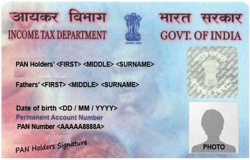

In [18]:
og

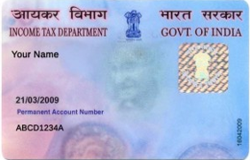

In [19]:
fake

In [20]:
og = cv2.imread('pan_card_detection/image/og.png')
fake = cv2.imread('pan_card_detection/image/fake.png')

In [39]:
og_gray = cv2.cvtColor(og, cv2.COLOR_BGR2GRAY)
fake_gray = cv2.cvtColor(fake, cv2.COLOR_BGR2GRAY)

In [40]:
og_gray, fake_gray

(array([[254, 254, 253, ..., 253, 252, 254],
        [254, 251, 249, ..., 249, 249, 252],
        [253, 249, 252, ..., 249, 248, 251],
        ...,
        [249, 229, 217, ..., 190, 200, 238],
        [251, 249, 246, ..., 238, 241, 247],
        [253, 254, 253, ..., 255, 254, 253]], dtype=uint8),
 array([[254, 254, 254, ..., 252, 252, 254],
        [254, 254, 254, ..., 251, 251, 253],
        [254, 254, 250, ..., 238, 252, 252],
        ...,
        [253, 255, 250, ..., 236, 251, 252],
        [254, 253, 253, ..., 248, 253, 253],
        [255, 254, 254, ..., 253, 253, 250]], dtype=uint8))

In [41]:
import numpy as np

In [42]:
(score, diff)= ssim(og_gray,fake_gray, full=True)
diff = (diff * 255).astype(np.uint8)
print(score)

0.37638549890119716


In [43]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [44]:
# Looping 
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(og, (x,y),(x+w,y+h), (0,0,255),2)
  cv2.rectangle(fake, (x,y),(x+w,y+h), (0,0,255),2)

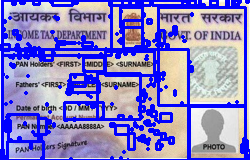

In [45]:
Image.fromarray(og)

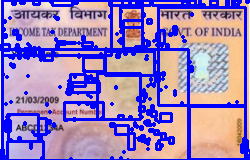

In [47]:
Image.fromarray(fake)

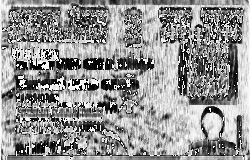

In [48]:
Image.fromarray(diff)

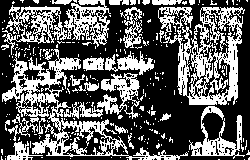

In [50]:
Image.fromarray(thresh)